# CV Visualization

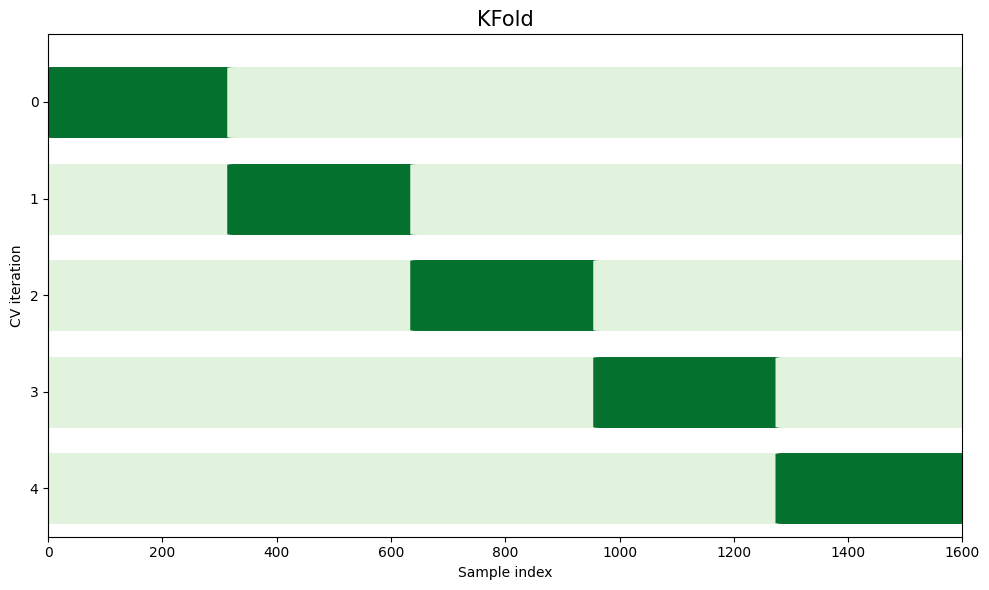

In [61]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Patch

from sklearn.model_selection import (
    GroupKFold,
    GroupShuffleSplit,
    KFold,
    ShuffleSplit,
    StratifiedGroupKFold,
    StratifiedKFold,
    StratifiedShuffleSplit,
    TimeSeriesSplit,
)

rng = np.random.RandomState(1338)
cmap_data = plt.cm.Paired
cmap_cv = plt.cm.coolwarm

def plot_cv_indices(cv, X, y, ax, n_splits, lw=20):
    """Create a sample plot for indices of a cross-validation object."""

    # Generate the training/testing visualizations for each CV split
    for ii, (tr, tt) in enumerate(cv.split(X=X, y=y)):
        # Fill in indices with the training/test groups
        indices = np.array([np.nan] * len(X))
        indices[tt] = 1
        indices[tr] = 0

        # Visualize the results
        ax.scatter(
            range(len(indices)),
            [ii + 0.5] * len(indices),
            c=indices,
            marker="_",
            lw=lw,  # Increase bar width
            cmap=plt.cm.Greens,  # Change color map here
            vmin=-0.2,
            vmax=1.2,
        )

    # Formatting
    yticklabels = list(range(n_splits))
    ax.set(
        yticks=np.arange(n_splits) + 0.5,
        yticklabels=yticklabels,
        xlabel="Sample index",
        ylabel="CV iteration",
        ylim=[n_splits, -0.2],
        xlim=[0, len(X)],  # Adjust x-axis limit based on the data size
    )
    ax.set_title("{}".format(type(cv).__name__), fontsize=15)
    return ax

# Example usage
fig, ax = plt.subplots(figsize=(10, 6))

# Create a toy dataset
X = np.random.rand(1600, 2)
y = np.random.randint(0, 2, size=1600)

# Initialize a cross-validation object
cv = KFold(n_splits=5)

# Call the function to plot CV indices
plot_cv_indices(cv, X, y, ax, n_splits=5, lw=50)

fig.savefig('cv_visualization.png', dpi=500)  # Change the file format and DPI as needed

plt.tight_layout()
plt.show()


# Ensemble Learning Visualization

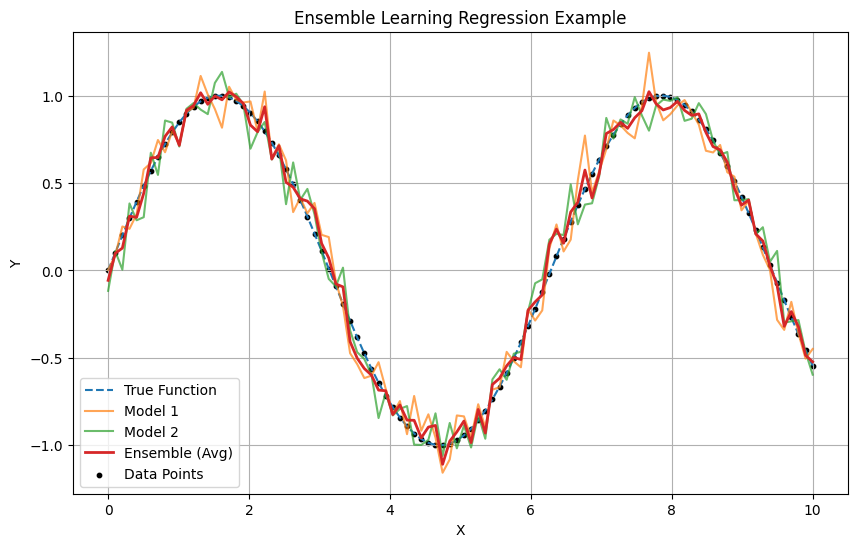

In [128]:
import numpy as np
import matplotlib.pyplot as plt

# Create sample data points
x = np.linspace(0, 10, 100)
y_true = np.sin(x) 
# + np.random.normal(0, 0.1, 100)  # True underlying function
y_model1 = np.sin(x) + np.random.normal(0, 0.1, 100)  # Individual model 1
y_model2 = np.sin(x) + np.random.normal(0, 0.1, 100)  # Individual model 2
y_ensemble = (y_model1 + y_model2) / 2  # Ensemble model

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(x, y_true, label='True Function', linestyle='dashed')
plt.plot(x, y_model1, label='Model 1', alpha=0.7)
plt.plot(x, y_model2, label='Model 2', alpha=0.7)
plt.plot(x, y_ensemble, label='Ensemble (Avg)', linewidth=2)
plt.scatter(x, y_true, color='black', s=10, label='Data Points')
plt.title('Ensemble Learning Regression Example')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid()
plt.savefig('ensemble_learning.png', dpi=500)  # Change the file format and DPI as needed
plt.show()


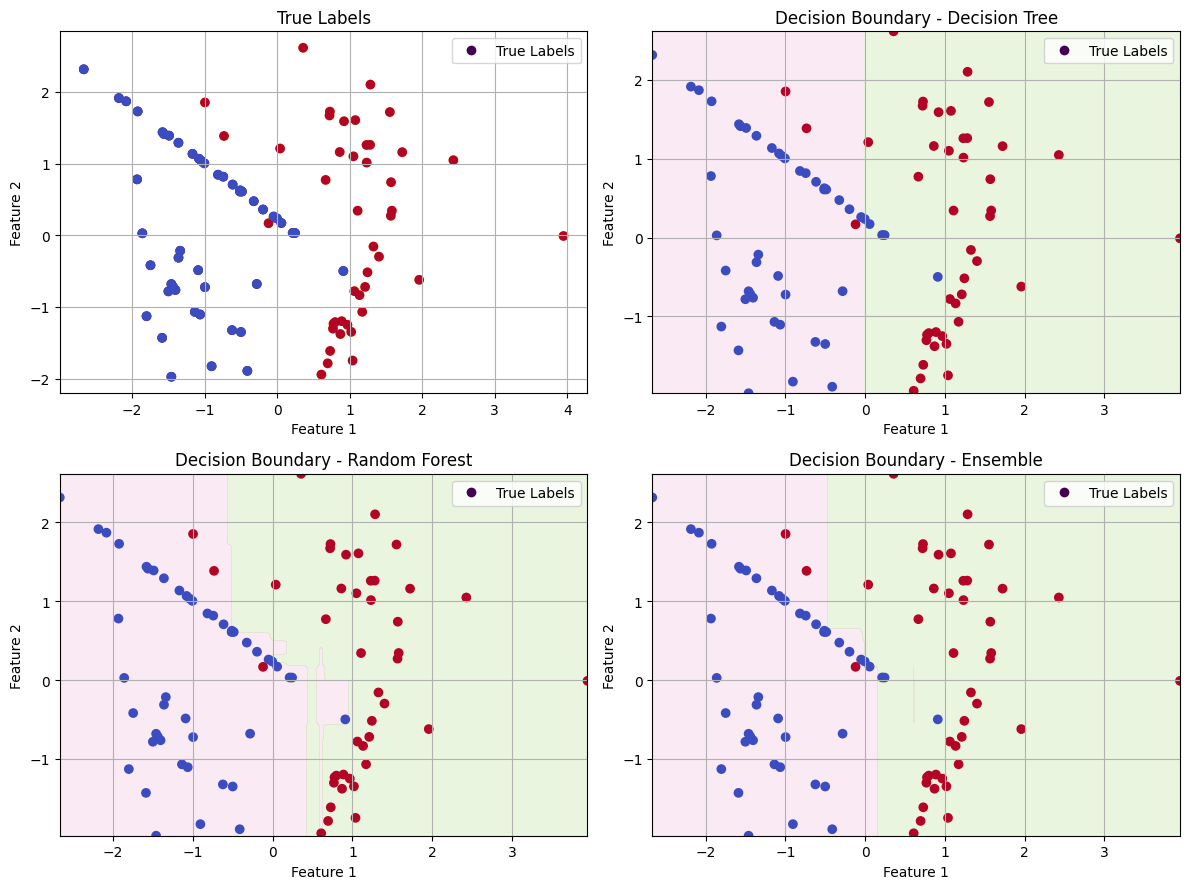

In [129]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Generate synthetic classification data
X, y = make_classification(n_samples=300, n_features=2, n_informative=2,
                           n_redundant=0, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create individual classifiers
clf1 = DecisionTreeClassifier(max_depth=1)
clf2 = RandomForestClassifier(n_estimators=3, random_state=42)

# Create an ensemble of classifiers
ensemble_clf = VotingClassifier(estimators=[('Decision Tree', clf1), ('Random Forest', clf2)], voting='soft')

# Train the models
clf1.fit(X_train, y_train)
clf2.fit(X_train, y_train)
ensemble_clf.fit(X_train, y_train)

# Make predictions
y_pred1 = clf1.predict(X_test)
y_pred2 = clf2.predict(X_test)
ensemble_pred = ensemble_clf.predict(X_test)

# Calculate accuracies
acc1 = accuracy_score(y_test, y_pred1)
acc2 = accuracy_score(y_test, y_pred2)
ensemble_acc = accuracy_score(y_test, ensemble_pred)

# Create a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 9))
axs = axs.ravel()

# Create the plot for true labels
scatter = axs[0].scatter(X_test[:, 0], X_test[:, 1], c=y_test,  marker='o', label='True Labels')
axs[0].scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='coolwarm', marker='o', label='True Labels')
axs[0].set_title('True Labels')
axs[0].set_xlabel('Feature 1')
axs[0].set_ylabel('Feature 2')
axs[0].legend(handles=[scatter.legend_elements()[0][0]], labels=['True Labels'], scatterpoints=1)
axs[0].grid()

# Calculate and plot decision boundaries for individual classifiers and ensemble
classifiers = [clf1, clf2, ensemble_clf]
classifiers_names = ['Decision Tree', 'Random Forest', 'Ensemble']

for i, (clf, name) in enumerate(zip(classifiers, classifiers_names)):
    probs = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1].reshape(xx.shape)
    # scatter = axs[0].scatter(X_test[:, 0], X_test[:, 1], c=y_test, marker='o', label='True Labels')
    axs[i+1].contourf(xx, yy, probs, levels=[0, 0.5, 1], cmap='PiYG', alpha=0.2)
    axs[i+1].scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='coolwarm', marker='o', label='True Labels')
    axs[i+1].set_title(f'Decision Boundary - {name}')
    axs[i+1].set_xlabel('Feature 1')
    axs[i+1].set_ylabel('Feature 2')
    axs[i+1].legend(handles=[scatter.legend_elements()[0][0]], labels=['True Labels'], scatterpoints=1)
    axs[i+1].grid()

plt.savefig('ensemble_learning_classification.png', dpi=500)  # Change the file format and DPI as needed
plt.tight_layout()
plt.show()


# PDF to PNG

In [131]:
import fitz  # PyMuPDF
from PIL import Image

In [133]:
def convert_pdf_to_png(pdf_path, png_path, dpi=500):
    pdf_document = fitz.open(pdf_path)
    pdf_page = pdf_document[0]  # Assuming you want to convert the first page

    # Convert the PDF page to an image
    pixmap = pdf_page.get_pixmap(matrix=fitz.Matrix(dpi / 72, dpi / 72))
    image = Image.frombytes("RGB", [pixmap.width, pixmap.height], pixmap.samples)

    # Save the image as PNG
    image.save(png_path, format="PNG")

    pdf_document.close()

# Replace these paths with your actual input PDF and output PNG file paths
input_pdf_path = "/home/ramez/Downloads/taxonomy.pdf"
output_png_path = "/home/ramez/Politechnika_Slaska_MSc/Thesis/Literature/figures/taxonomy_hq.png"

convert_pdf_to_png(input_pdf_path, output_png_path)